# PixelCNN for FashionMNIST

### In progress

**The notebook has been adapted from the notebook provided in David Foster's Generative Deep Learning, 2nd Edition.**

- Book: [Amazon](https://www.amazon.com/Generative-Deep-Learning-Teaching-Machines/dp/1098134184/ref=sr_1_1?keywords=generative+deep+learning%2C+2nd+edition&qid=1684708209&sprefix=generative+de%2Caps%2C93&sr=8-1)
- Original notebook (tensorflow and keras): [Github](https://github.com/davidADSP/Generative_Deep_Learning_2nd_Edition/blob/main/notebooks/05_autoregressive/02_pixelcnn/pixelcnn.ipynb)

In [78]:
import numpy as np

import matplotlib.pyplot as plt

import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader

from torchvision import datasets
from torchvision import transforms as Transforms
import torchvision.utils as vuitls

import torchinfo

## 0. Train Parameters

In [53]:
IMAGE_SIZE = 16
PIXEL_LEVELS = 32
N_FILTERS = 128
RESIDUAL_BLOCKS = 5
BATCH_SIZE = 128
EPOCHS = 150

## 1. Preparing FashionMNIST dataset

In [56]:
# Turn input image into (label-pixel representatin, pixel-wise labels)
def collate_fn(batch):
    batch = torch.stack([data[0] for data in batch])
    value_step = 1.0 / PIXEL_LEVELS
    labels = (batch / value_step).type(torch.int)
    imgs = labels.type(torch.float32) * PIXEL_LEVELS
    return imgs, labels

transform_fn = Transforms.Compose([
                    Transforms.ToTensor(),
                    Transforms.Resize(IMAGE_SIZE, antialias=True),                        
                ])

# Load FashionMNIST dataset
fashion_ds = datasets.FashionMNIST('../../data', 
                                  train=True, 
                                  download=True,
                                  transform=transform_fn,
                                  target_transform=target_transform)

# Get train dataloader
train_loader = DataLoader(fashion_ds, batch_size=BATCH_SIZE, shuffle=True,
                          collate_fn=collate_fn)

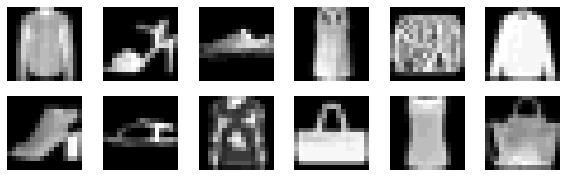

In [76]:
# Check dataset
def plot_imgs(batch, num_rows=2, num_cols=6):
    plt.figure(figsize=(10, 3))
    for i in range(num_rows * num_cols):
        ax = plt.subplot(num_rows, num_cols, i+1)
        ax.imshow(batch[i].permute(1, 2, 0), cmap='gray')
        ax.axis('off')
    plt.show()
        
sample_data = next(iter(train_loader))
plot_imgs(sample_data[0])